<a href="https://colab.research.google.com/github/utkarsh-1912/ML_Works/blob/main/Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Google Drive API

Importing the Dog vs Cat Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/gdrive/My Drive/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.10629.jpg', 'dog.5007.jpg', 'cat.4695.jpg', 'dog.11047.jpg', 'cat.10159.jpg', 'cat.7527.jpg', 'cat.3940.jpg', 'cat.5295.jpg', 'dog.11471.jpg', 'dog.645.jpg', 'cat.4180.jpg', 'cat.9423.jpg', 'dog.7333.jpg', 'dog.2171.jpg', 'cat.8905.jpg', 'cat.2451.jpg', 'dog.12208.jpg', 'cat.5200.jpg', 'cat.5449.jpg', 'cat.1076.jpg', 'cat.8667.jpg', 'dog.3077.jpg', 'dog.653.jpg', 'cat.6167.jpg', 'dog.2172.jpg', 'dog.11858.jpg', 'dog.10463.jpg', 'cat.4960.jpg', 'dog.11139.jpg', 'cat.270.jpg', 'dog.3930.jpg', 'dog.9354.jpg', 'dog.63.jpg', 'dog.436.jpg', 'cat.7506.jpg', 'dog.1741.jpg', 'dog.6286.jpg', 'dog.12076.jpg', 'dog.7397.jpg', 'cat.1247.jpg', 'dog.4195.jpg', 'dog.1028.jpg', 'cat.2996.jpg', 'dog.2325.jpg', 'cat.421.jpg', 'dog.4753.jpg', 'dog.7258.jpg', 'cat.8945.jpg', 'dog.5556.jpg', 'dog.10170.jpg', 'dog.5246.jpg', 'cat.4992.jpg', 'dog.3698.jpg', 'cat.7183.jpg', 'cat.9312.jpg', 'dog.8775.jpg', 'dog.7955.jpg', 'cat.7059.jpg', 'dog.247.jpg', 'dog.5645.jpg', 'dog.1920.jpg', 'dog.1152.jpg', 'dog.

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

Displaying the images of dogs and cats

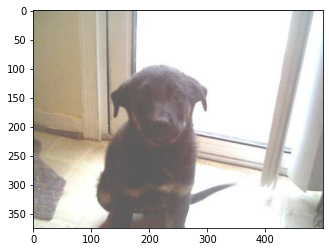

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.11047.jpg')
imgplt = plt.imshow(img)
plt.show()

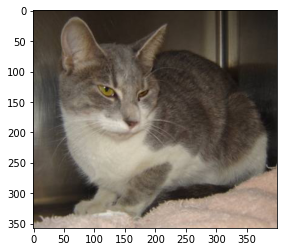

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



cat
dog
cat
dog
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [30]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [34]:
# display resized dog image
# img = mpimg.imread('content/image resized/dog.8298.jpg')
# imgplt = plt.imshow(img)
# plt.show()

In [35]:
# display resized cat image
# img = mpimg.imread('/content/image resized/cat.4352.jpg')
# imgplt = plt.imshow(img)
# plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [36]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [37]:
print(filenames[0:5])
print(len(filenames))

['cat.10629.jpg', 'dog.5007.jpg', 'cat.4695.jpg', 'dog.11047.jpg', 'cat.10159.jpg']
2000


In [38]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 0]
2000


In [39]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


Converting all the resized images to numpy arrays

In [40]:
import cv2
import glob

In [41]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [42]:
print(dog_cat_images)

[[[[119 111 121]
   [116 108 118]
   [111 106 115]
   ...
   [251 254 245]
   [248 253 244]
   [247 252 243]]

  [[146 138 148]
   [134 126 136]
   [119 114 123]
   ...
   [255 255 249]
   [253 255 249]
   [253 255 249]]

  [[105 100 109]
   [125 120 129]
   [143 138 147]
   ...
   [250 253 244]
   [246 249 240]
   [242 245 236]]

  ...

  [[138 133 130]
   [136 131 128]
   [135 130 127]
   ...
   [179 222 213]
   [101 142 135]
   [ 77 114 110]]

  [[135 130 127]
   [134 129 126]
   [133 128 125]
   ...
   [114 157 148]
   [ 80 121 114]
   [101 138 134]]

  [[132 127 124]
   [131 126 123]
   [131 126 123]
   ...
   [126 169 160]
   [ 97 138 131]
   [ 68 105 101]]]


 [[[252 252 252]
   [250 250 250]
   [249 249 249]
   ...
   [252 250 250]
   [251 249 249]
   [252 250 250]]

  [[247 247 247]
   [244 244 244]
   [240 240 240]
   ...
   [241 239 239]
   [245 243 243]
   [251 249 249]]

  [[246 246 246]
   [240 240 240]
   [232 232 232]
   ...
   [228 228 228]
   [241 239 239]
   [253 251

In [43]:
type(dog_cat_images)

numpy.ndarray

In [44]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [45]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [48]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [49]:
print(X_train_scaled)

[[[[0.1372549  0.18039216 0.26666667]
   [0.1372549  0.18039216 0.26666667]
   [0.1372549  0.18039216 0.26666667]
   ...
   [0.08627451 0.12156863 0.25098039]
   [0.08235294 0.11764706 0.24705882]
   [0.07843137 0.11372549 0.24313725]]

  [[0.1372549  0.18039216 0.26666667]
   [0.14117647 0.18431373 0.27058824]
   [0.14117647 0.18431373 0.27058824]
   ...
   [0.09019608 0.1254902  0.25490196]
   [0.09019608 0.1254902  0.25490196]
   [0.08627451 0.12156863 0.25098039]]

  [[0.1372549  0.18039216 0.26666667]
   [0.14117647 0.18431373 0.27058824]
   [0.14509804 0.18823529 0.2745098 ]
   ...
   [0.09411765 0.1372549  0.25490196]
   [0.09411765 0.1372549  0.25490196]
   [0.09411765 0.1372549  0.25490196]]

  ...

  [[0.10980392 0.01176471 0.45882353]
   [0.11372549 0.01568627 0.4627451 ]
   [0.11764706 0.01568627 0.4745098 ]
   ...
   [0.10588235 0.01568627 0.49411765]
   [0.10196078 0.01176471 0.49019608]
   [0.10196078 0.01176471 0.49019608]]

  [[0.11372549 0.01176471 0.47058824]
   [0.1

**Building the Neural Network**

In [50]:
import tensorflow as tf
import tensorflow_hub as hub

In [51]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [52]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [53]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [54]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 42s 766ms/step - loss: 0.1736 - acc: 0.9375
Epoch 2/5
50/50 [==============================] - 40s 809ms/step - loss: 0.0681 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 39s 773ms/step - loss: 0.0532 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 39s 774ms/step - loss: 0.0407 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 41s 814ms/step - loss: 0.0341 - acc: 0.9881


In [55]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 10s 733ms/step - loss: 0.0598 - acc: 0.9750
Test Loss = 0.05983363091945648
Test Accuracy = 0.9750000238418579


**Predictive System**

Path of the image to be predicted: /content/train/cat.4352.jpg


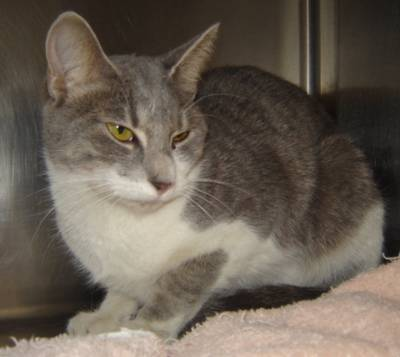

[[ 3.6840346 -4.9685464]]
0
The image represents a Cat


In [58]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/train/dog.11047.jpg


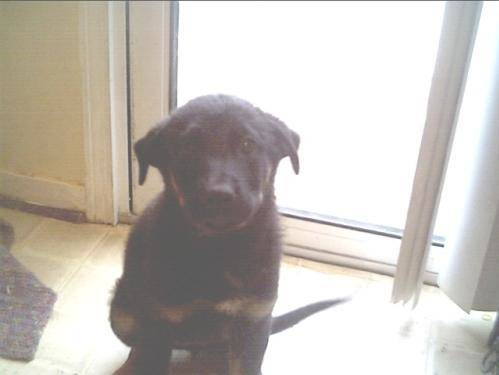

[[-3.221846   3.0725424]]
1
The image represents a Dog


In [60]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')